In [3]:
!pip install ucimlrepo
!pip install scipy
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from ucimlrepo import fetch_ucirepo
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from sklearn.preprocessing import MinMaxScaler
import scipy.stats

In [5]:
iranian_churn = fetch_ucirepo(id=563)

df = iranian_churn.data.features

# Exploración

In [6]:
iranian_churn.metadata

{'uci_id': 563,
 'name': 'Iranian Churn',
 'repository_url': 'https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset',
 'data_url': 'https://archive.ics.uci.edu/static/public/563/data.csv',
 'abstract': "This dataset is randomly collected from an Iranian telecom company's database over a period of 12 months.",
 'area': 'Business',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 3150,
 'num_features': 13,
 'feature_types': ['Integer'],
 'demographics': ['Age'],
 'target_col': ['Churn'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2020,
 'last_updated': 'Sat Mar 09 2024',
 'dataset_doi': '10.24432/C5JW3Z',
 'creators': [],
 'intro_paper': None,
 'additional_info': {'summary': 'This dataset is randomly collected from an Iranian telecom companyâ€™s database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13

In [7]:
iranian_churn.variables

,name,role,type,demographic,description,units,missing_values
0,Call Failure,Feature,Integer,None,None,None,no
1,Complains,Feature,Binary,None,None,None,no
2,Subscription Length,Feature,Integer,None,None,None,no
3,Charge Amount,Feature,Integer,None,None,None,no
4,Seconds of Use,Feature,Integer,None,None,None,no
5,Frequency of use,Feature,Integer,None,None,None,no
6,Frequency of SMS,Feature,Integer,None,None,None,no
7,Distinct Called Numbers,Feature,Integer,None,None,None,no
8,Age Group,Feature,Integer,Age,None,None,no
9,Tariff Plan,Feature,Integer,None,None,None,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 320.1 KB


In [9]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000


## Univariable


### LLamadas fallidas

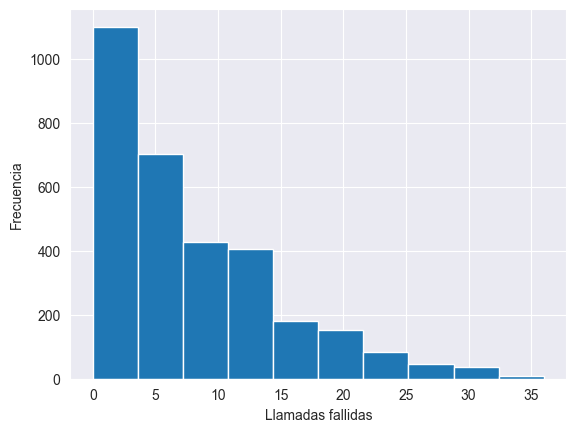

In [10]:
plt.hist(df['Call  Failure'])
plt.xlabel('Llamadas fallidas')
plt.ylabel('Frecuencia')
plt.show()

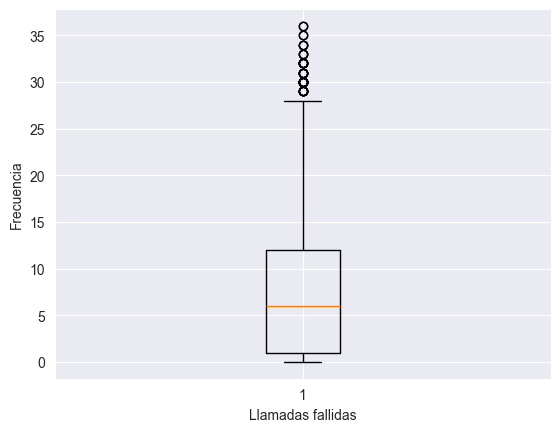

In [11]:
plt.boxplot(df['Call  Failure'])
plt.xlabel('Llamadas fallidas')
plt.ylabel('Frecuencia')
plt.show()

## Quejas

## Limpieza

In [12]:
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados.duplicated().sum()

np.int64(0)

In [13]:
scaler = MinMaxScaler()

scaler.fit(df_sin_duplicados)
pd_normalizado = pd.DataFrame(scaler.transform(df_sin_duplicados))
pd_normalizado.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000
mean,0.217756,0.081100,0.669244,0.097955,0.266584,0.277734,0.142039,0.247245,0.459626,0.080748,0.236248,0.402504,0.220424
std,0.203470,0.273037,0.198647,0.155292,0.245678,0.224865,0.214989,0.176914,0.223411,0.272495,0.424851,0.221759,0.237694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.055556,0.000000,0.590909,0.000000,0.087010,0.113725,0.013410,0.113402,0.250000,0.000000,0.000000,0.250000,0.055186
50%,0.166667,0.000000,0.727273,0.000000,0.179345,0.215686,0.042146,0.216495,0.500000,0.000000,0.000000,0.375000,0.108168
75%,0.333333,0.000000,0.795455,0.200000,0.380954,0.376471,0.172414,0.350515,0.500000,0.000000,0.000000,0.375000,0.365860
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
from sklearn.decomposition import PCA
modelo = PCA(n_components=12)
df_sin_duplicados_sin_quejas = df_sin_duplicados.drop(columns=['Complains'])
scaler.fit(df_sin_duplicados_sin_quejas)
df_normalizado = scaler.transform(df_sin_duplicados_sin_quejas)
modelo.fit(df_sin_duplicados_sin_quejas)
# modelo.transform(df_sin_duplicados_sin_quejas)
PCA_datos = pd.DataFrame(data=modelo.transform(df_sin_duplicados_sin_quejas))


In [15]:
df_sin_duplicados_sin_quejas.shape

(2836, 12)

In [16]:
print(modelo.explained_variance_ratio_)

[9.86939591e-01 1.29865084e-02 3.70631811e-05 2.19743509e-05
 6.86003129e-06 4.23776072e-06 1.97130114e-06 1.72125847e-06
 6.10086814e-08 5.83445032e-09 3.47840499e-09 2.33165675e-09]


Text(0, 0.5, 'cumulative explained variance')

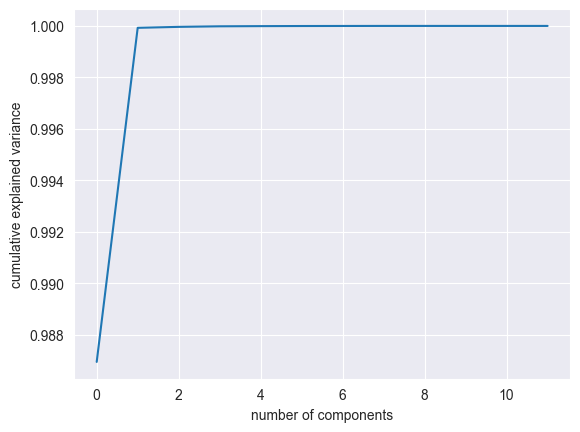

In [17]:
plt.plot(modelo.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [22]:
from sklearn.decomposition import PCA
modelo = PCA(n_components=0.95)
df_sin_duplicados_sin_quejas = df_sin_duplicados.drop(columns=['Complains'])
scaler.fit(df_sin_duplicados_sin_quejas)
df_normalizado = scaler.transform(df_sin_duplicados_sin_quejas)
modelo.fit(df_sin_duplicados_sin_quejas)
modelo.transform(df_sin_duplicados_sin_quejas)

array([[ -199.92817781],
       [-4254.94490166],
       [-2046.18361439],
       ...,
       [-2779.92452685],
       [ 6160.72789517],
       [-3639.75701676]], shape=(2836, 1))

In [23]:
df_sin_duplicados['Complains']

0       0
1       0
2       0
3       0
4       0
       ..
3096    0
3097    0
3099    1
3123    0
3131    1
Name: Complains, Length: 2836, dtype: int64

In [58]:
PCA_datos = pd.concat([pd.DataFrame(modelo.transform(df_sin_duplicados_sin_quejas)),df_sin_duplicados['Complains'].reset_index(drop=True)],axis=1)
PCA_datos

,0,Complains
0,-199.928178,0
1,-4254.944902,0
2,-2046.183614,0
3,-369.586777,0
4,-2176.989511,0
...,...,...
2831,4665.294520,0
2832,-1407.285399,0
2833,-2779.924527,1
2834,6160.727895,0


In [59]:
# Imprimo los datos a un CSV
PCA_datos.to_csv('./PCA_datos.csv', index=False)

In [15]:
pd_final = pd.concat([PCA_datos,df_sin_duplicados['Complains']])

In [28]:
df_sin_duplicados

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,17,0,17,1,9237,177,80,42,5,1,1,55,261.210
3097,13,0,18,4,3157,51,38,21,3,1,1,30,280.320
3099,8,1,11,2,1792,25,7,9,3,1,1,30,100.680
3123,26,0,38,9,10740,99,8,44,5,2,1,55,174.585


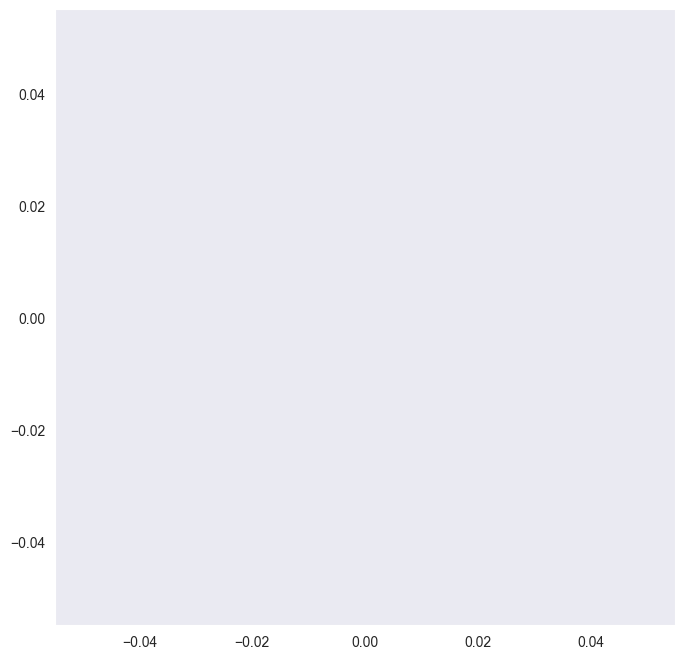

In [17]:
#Visualización

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

indices_a_dibujar = (pd_final['Complains'] == 0 ) | (pd_final['Complains'] == 1)
ax.scatter(pd_final.loc[indices_a_dibujar, 0], pd_final.loc[indices_a_dibujar, "Complains"], c=pd_final.loc[indices_a_dibujar, "Complains"], cmap='viridis', alpha=0.5)
indices_a_dibujar = pd_final['Complains'] == 1
ax.scatter(pd_final.loc[indices_a_dibujar, 0], pd_final.loc[indices_a_dibujar, "Complains"])

ax.grid()
